In [1]:
import pandas as pd
import numpy as np
import ast
import sys
import os

In [2]:
folder = 'C:/Users/oryan/Documents/esac-project/predictions'

In [3]:
df = pd.read_csv(f'{folder}/decals-base-validation.csv',index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, /mmfs1/storage/users/oryan/hubble-cutouts/AHZ2001lqr_300_300_3.png to /mmfs1/storage/users/oryan/hubble-cutouts/AHZ2000kmf_300_300_3.png
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   smooth-or-featured_smooth_pred            554 non-null    object
 1   smooth-or-featured_featured-or-disk_pred  554 non-null    object
 2   smooth-or-featured_artifact_pred          554 non-null    object
 3   disk-edge-on_yes_pred                     554 non-null    object
 4   disk-edge-on_no_pred                      554 non-null    object
 5   has-spiral-arms_yes_pred                  554 non-null    object
 6   has-spiral-arms_no_pred                   554 non-null    object
 7   bar_strong_pred                           554 non-null    object
 8   bar_weak_pred                             554 non-null    object
 9

In [5]:
df_int = df[['merging_none_pred','merging_minor-disturbance_pred','merging_major-disturbance_pred','merging_merger_pred']]

In [6]:
df_int

,merging_none_pred,merging_minor-disturbance_pred,merging_major-disturbance_pred,merging_merger_pred
id_str,,,,
/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2001lqr_300_300_3.png,"[2.7373766899108887, 3.3495750427246094, 3.018...","[1.2522252798080444, 1.3647379875183105, 1.226...","[1.0176585912704468, 1.0254333019256592, 1.013...","[4.808195114135742, 3.6144979000091553, 3.4211..."
/mmfs1/storage/users/oryan/hubble-cutouts/AHZ20008op_300_300_3.png,"[2.1020584106445312, 2.613466739654541, 2.6933...","[1.2098485231399536, 1.2032870054244995, 1.188...","[1.0536326169967651, 1.0482300519943237, 1.025...","[3.615347385406494, 3.5903196334838867, 2.6892..."
/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2000ewi_300_300_3.png,"[1.8991992473602295, 2.082963466644287, 1.9083...","[1.1604549884796143, 1.358180046081543, 1.3009...","[1.3647910356521606, 2.003004550933838, 1.6264...","[2.825439453125, 8.082298278808594, 4.99707937..."
/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2000lmb_300_300_3.png,"[11.375259399414062, 7.905166149139404, 7.2324...","[4.675280570983887, 4.261478424072266, 3.53584...","[3.40800404548645, 5.616032600402832, 3.366075...","[1.3556526899337769, 1.5004209280014038, 1.332..."
/mmfs1/storage/users/oryan/hubble-cutouts/AHZ20011fw_300_300_3.png,"[17.480573654174805, 13.816539764404297, 13.73...","[3.130089521408081, 2.186141014099121, 1.60726...","[1.2611072063446045, 1.06624436378479, 1.01552...","[1.2871447801589966, 1.4353485107421875, 1.224..."
...,...,...,...,...
/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2001i1p_300_300_3.png,"[9.476373672485352, 22.558311462402344, 20.084...","[1.4861339330673218, 2.0941805839538574, 2.248...","[1.0065757036209106, 1.0262384414672852, 1.078...","[2.081256628036499, 1.2795997858047485, 1.6042..."
/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2000r26_300_300_3.png,"[6.500507831573486, 4.312294006347656, 3.59595...","[1.6588594913482666, 1.3701659440994263, 1.325...","[1.017831563949585, 1.0156960487365723, 1.0266...","[1.5532275438308716, 2.3453338146209717, 2.139..."
/mmfs1/storage/users/oryan/hubble-cutouts/AHZ40001su_300_300_3.png,"[14.351585388183594, 8.39222526550293, 8.77956...","[1.8487434387207031, 1.4014356136322021, 1.448...","[1.0139167308807373, 1.0098910331726074, 1.013...","[1.2585172653198242, 1.228901743888855, 1.3811..."


In [7]:
df_red = (
    df_int
    .assign(no_merger = df_int.merging_none_pred.apply(lambda x: np.mean(ast.literal_eval(x))))
    .assign(minor_merger = df_int['merging_minor-disturbance_pred'].apply(lambda x: np.mean(ast.literal_eval(x))))
    .assign(major_merger = df_int['merging_major-disturbance_pred'].apply(lambda x: np.mean(ast.literal_eval(x))))
    .assign(ongoing_merger = df_int.merging_merger_pred.apply(lambda x: np.mean(ast.literal_eval(x))))
    .drop(columns=['merging_none_pred','merging_minor-disturbance_pred','merging_major-disturbance_pred','merging_merger_pred'])
)

In [8]:
def finding_prediction(row):
    merger_event = row.minor_merger + row.major_merger + row.ongoing_merger
    no_merger_event = row.no_merger
    if no_merger_event > merger_event:
        return 0
    elif no_merger_event < merger_event:
        return 1

In [9]:
df_red.iloc[0].idxmax(axis=1)

'ongoing_merger'

In [10]:
df_binary = (
    df_red
    .assign(binary_prediction = df_red.apply(lambda row: finding_prediction(row), axis=1))
    .reset_index()
)

In [11]:
df_binary

,id_str,no_merger,minor_merger,major_merger,ongoing_merger,binary_prediction
0,/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2...,3.030057,1.328302,1.039282,3.481204,1
1,/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2...,2.661391,1.241407,1.038164,3.348100,1
2,/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2...,2.104251,1.254405,1.597351,4.871911,1
3,/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2...,8.201539,3.914404,4.026549,1.376347,1
4,/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2...,15.794828,2.211584,1.082632,1.283485,0
...,...,...,...,...,...,...
549,/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2...,16.677358,1.966698,1.032239,1.777253,0
550,/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2...,4.503565,1.401701,1.015841,1.960873,0
551,/mmfs1/storage/users/oryan/hubble-cutouts/AHZ4...,10.977903,1.634825,1.014103,1.256122,0
552,/mmfs1/storage/users/oryan/hubble-cutouts/AHZ2...,8.755816,3.208482,2.510744,2.167427,0


In [12]:
df_binary.binary_prediction.value_counts()

0    437
1    117
Name: binary_prediction, dtype: int64

## Importing Answers

In [13]:
manifest = (
    pd.read_csv('C:/Users/oryan/Documents/esac-project/manifests/gz-hubble-local-manifest.csv', index_col=0)
    .drop(columns=['RA','Dec','imaging','local_location'])
)

In [14]:
df_for_merge = (
    df_binary
    .assign(zooniverse_id = df_binary.id_str.apply(lambda x: os.path.basename(x.replace('_300_300_3.png',''))))
    .drop(columns=['id_str'])
)

In [15]:
df_for_merge

,no_merger,minor_merger,major_merger,ongoing_merger,binary_prediction,zooniverse_id
0,3.030057,1.328302,1.039282,3.481204,1,AHZ2001lqr
1,2.661391,1.241407,1.038164,3.348100,1,AHZ20008op
2,2.104251,1.254405,1.597351,4.871911,1,AHZ2000ewi
3,8.201539,3.914404,4.026549,1.376347,1,AHZ2000lmb
4,15.794828,2.211584,1.082632,1.283485,0,AHZ20011fw
...,...,...,...,...,...,...
549,16.677358,1.966698,1.032239,1.777253,0,AHZ2001i1p
550,4.503565,1.401701,1.015841,1.960873,0,AHZ2000r26
551,10.977903,1.634825,1.014103,1.256122,0,AHZ40001su
552,8.755816,3.208482,2.510744,2.167427,0,AHZ2000qzj


In [16]:
df_merged = (
    manifest
    .merge(df_for_merge, on='zooniverse_id',how='left')
    .dropna()
)

In [17]:
df_merged

,zooniverse_id,interacting,no_merger,minor_merger,major_merger,ongoing_merger,binary_prediction
0,AHZ10004js,1,2.709847,1.233861,1.034758,5.324474,1.0
1,AHZ20000ak,1,12.768390,2.104334,1.055217,1.625290,0.0
2,AHZ20000f7,1,5.180593,2.057485,1.925134,1.752994,1.0
3,AHZ20000gx,1,5.817422,1.535977,1.053702,2.100807,0.0
4,AHZ20000hj,1,6.069295,2.320427,2.014291,1.779166,1.0
...,...,...,...,...,...,...,...
592,AHZ2000xli,0,8.602982,1.618816,1.011904,2.288148,0.0
593,AHZ2001l95,0,7.806874,1.610621,1.026317,1.818071,0.0
595,AHZ2000a8x,0,4.164887,2.189656,1.710103,1.427099,1.0
596,AHZ2000e76,0,21.207555,3.161873,1.128067,1.400876,0.0


In [18]:
print(df_merged.interacting.value_counts())
print(df_merged.binary_prediction.value_counts())

0    313
1    241
Name: interacting, dtype: int64
0.0    437
1.0    117
Name: binary_prediction, dtype: int64


In [56]:
false_positives = len(df_merged.query('interacting == 0 & binary_prediction == 1'))
false_positives

69

In [57]:
false_negatives = len(df_merged.query('interacting == 1 & binary_prediction == 0'))
false_negatives

193

In [59]:
incorrect_perc = (false_positives + false_negatives)/len(df_merged)
incorrect_perc

0.4729241877256318

## Looking at Recall Curves

In [60]:
df_no_merger = df_merged[['zooniverse_id','interacting','no_merger']]

In [118]:
cutoffs = np.linspace(0.03,0.99,1000)

In [119]:
df_no_merger_per = df_no_merger.assign(no_merger_100 = df_no_merger.no_merger.apply(lambda x: x/100))

In [120]:
def get_precision(df,cut):
    df_binary = (
        df.assign(binary_prediction = df.no_merger_100.apply(lambda x: 1 if x <= cut else 0))
    )
    tp = len(df_binary.query('interacting == 1 & binary_prediction == 1'))
    fp = len(df_binary.query('interacting == 0 & binary_prediction == 1'))
        
    p = tp/(tp + fp)
    
    return p

In [121]:
def get_recall(df, cut):
    df_binary = (
        df.assign(binary_prediction = df.no_merger_100.apply(lambda x: 1 if x <= cut else 0))
    )
    tp = len(df_binary.query('interacting == 1 & binary_prediction == 1'))
    fn = len(df_binary.query('interacting == 1 & binary_prediction == 0'))
    
    r = tp/(tp + fn)
    
    return r

In [122]:
pr = []
for i in cutoffs:
    precision = get_precision(df_no_merger_per, i)
    recall = get_recall(df_no_merger_per,i)
    pr.append([recall, precision])

In [123]:
pr_df = pd.DataFrame(pr).rename(columns={0:'recall',1:'precision'})

<AxesSubplot:title={'center':'Precision Recall for using GZ Base Model'}, xlabel='recall'>

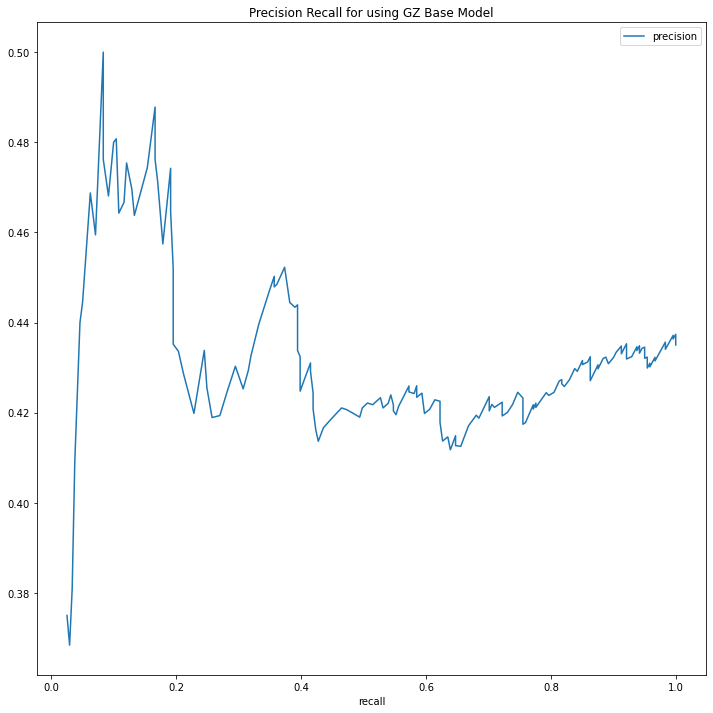

In [124]:
pr_df.plot(x = 'recall', y='precision', title='Precision Recall for using GZ Base Model',figsize=(12,12))